# Analyzing Data

In this code the goal is to create a figure that contains three different axes. The requirements for the figures are as following:
1. Create a Heatmap
2. Choose any axes type
3. Choose any axes type except barchart, scatterplot oder line diagram


## Connecting to DB

At first an connection to the dabase is established, to get access to the data. The output of the Code is an SQL-Query, that contains the databasename (first element) und -status (second element). It's just to proof, that the connection was sucessful.
</br></br>
*CAUTION:* The following Code was written for an locally hosted SQL-Server with Windows Authentification.

In [16]:
import pyodbc as odbc

#DRIVER = input(r'Insert Driver name')           # input driver name -> use because of different driver names
#print(f"you choose: {DRIVER} as your driver")   # print driver name for confirmation
DRIVER = 'SQL Server'                           # set driver name to 'SQL Server

#SERVER = input(r'Insert Server name')           # input server name -> use because of different server names
#print(f"you choose: {SERVER} as your server")   # print server name for confirmation

SERVER = f'CUBRIM\SQLEXPRESS'

#DB = input(r'Insert Database name')             # input database name -> use because of different database names
#print(f"you choose: {DB} as your database")     # print database name for confirmation

DB = 'mueller'

# Build Connection
connect_string = f'DRIVER={DRIVER};SERVER={SERVER};DATABASE={DB};Trusted_Connection=yes;'   # build connection string
conn = odbc.connect(connect_string)                                                         # connect to database
cursor = conn.cursor()                                                                      # create cursor object

cursor.execute(f"SELECT DB_NAME() AS DatabaseName, CONVERT(varchar(255),DATABASEPROPERTYEX('master', 'Status')) AS DBStatus")   # small query to get the server status
x = cursor.fetchall()
print(x)                                                                                                                # print query result

[('mueller', 'ONLINE')]


## Heatmap

Heatmap shows the mean approvalquote of approve in general, approve democrats and approve republicans. By quarter and Year

- one start and end year aren't matching
- to keep the work simpler, that isn't 

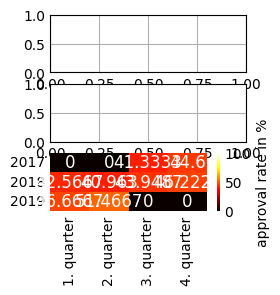

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def convertLisTupleToList(listIN: list)-> list:
    '''used convert list of tuples into one-dimensional list'''
    listOUT = []

    for i in range (0, len(listIN)):
        listOUT.append(listIN[i][0])

    return listOUT


cursor.execute(f"SELECT DISTINCT YEAR(startDate), YEAR(endDate) FROM fact_survey WHERE YEAR(startDate) = YEAR(endDate)")
result_years = cursor.fetchall()
labels_year = convertLisTupleToList(result_years)

cursor.execute(f"SELECT categorie FROM dim_categorieDate")
result_quarters = cursor.fetchall()
labels_quarter = convertLisTupleToList(result_quarters)

cursor.execute(f"SELECT approve, approveDemocrats, approveRepublicans, startQuartal FROM all_fact_dim WHERE YEAR(startDate) = YEAR(endDate) AND startQuartal = endQuartal AND YEAR(startDate) = 2017")
data_2017 = cursor.fetchall()

cursor.execute(f"SELECT approve, approveDemocrats, approveRepublicans, startQuartal FROM all_fact_dim WHERE YEAR(startDate) = YEAR(endDate) AND startQuartal = endQuartal AND YEAR(startDate) = 2018")
data_2018 = cursor.fetchall()

cursor.execute(f"SELECT approve, approveDemocrats, approveRepublicans, startQuartal FROM all_fact_dim WHERE YEAR(startDate) = YEAR(endDate) AND startQuartal = endQuartal AND YEAR(startDate) = 2019")
data_2019 = cursor.fetchall()

def dataYearQuartal (data: list)-> list:
    '''used to get the data for a specific year and quartal'''
    dataOUT = []

    meanByQ1 = 0
    countDataQ1 = 0

    meanByQ2 = 0
    countDataQ2 = 0

    meanByQ3 = 0
    countDataQ3 = 0

    meanByQ4 = 0
    countDataQ4 = 0

    for i in range (0, len(data)):
        if data[i][3] == '1. quarter':
            countDataQ1 += 3
            meanByQ1 += data[i][0]+data[i][1]+data[i][2]

        elif data[i][3] == '2. quarter':
            countDataQ2 += 3
            meanByQ2 += data[i][0]+data[i][1]+data[i][2]

        elif data[i][3] == '3. quarter':
            countDataQ3 += 3
            meanByQ3 += data[i][0]+data[i][1]+data[i][2]

        elif data[i][3] == '4. quarter':
            countDataQ4 += 3
            meanByQ4 += data[i][0]+data[i][1]+data[i][2]

    if countDataQ1 == 0:
        dataOUT.append(0)
    else:
        meanByQ1 = meanByQ1 / countDataQ1
        dataOUT.append(meanByQ1)

    if countDataQ2 == 0:
        dataOUT.append(0)
    else:
        meanByQ2 = meanByQ2 / countDataQ2
        dataOUT.append(meanByQ2)

    if countDataQ3 == 0:
        dataOUT.append(0)
    else:
        meanByQ3 = meanByQ3 / countDataQ3
        dataOUT.append(meanByQ3)

    if countDataQ4 == 0:
        dataOUT.append(0)
    else:
        meanByQ4 = meanByQ4 / countDataQ4
        dataOUT.append(meanByQ4)

    return dataOUT

data_2017 = dataYearQuartal(data_2017)
data_2018 = dataYearQuartal(data_2018)
data_2019 = dataYearQuartal(data_2019)

heat_array = (data_2017, data_2018, data_2019)


df = pd.DataFrame(heat_array, index=labels_year, columns=labels_quarter)

fig, ax = plt.subplots(3)

ax = sns.heatmap(df, annot=True, fmt="g", cmap='hot', vmin=0, vmax=100, annot_kws={"size": 12}, cbar_kws={'label': 'approval rate in %'})



## Scatterplot

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import numpy as np


def convertLisTupleToList(listIN: list)-> list:
    '''used convert list of tuples into one-dimensional list'''
    listOUT = []

    for i in range (0, len(listIN)):
        listOUT.append(listIN[i][0])

    return listOUT


cursor.execute(f"SELECT * FROM dim_categorieDate")
resultQuarter = cursor.fetchall()
resultQuarter = convertLisTupleToList(resultQuarter)
 
cursor.execute(f"SELECT * FROM ")










[1, 2, 3, 4]
